# Probing the temporal evolution of voting blocs using an in _silico study_ of allelomimetic behavior


This study investigates the emergence of voting blocs through **allelomimesis**, a copying behavior where individuals tend to mimic their neighbors' choices. Using a two-dimensional lattice model (50x50 grid) with binary choice dynamics (represented by green and blue states), I simulate how local interactions lead to global pattern formation in voting behavior. The model employs a simple majority rule where three randomly selected individuals per time step update their choices based on their immediate Moore neighborhood's preference, with a deterministic copying probability of 1. Starting from a random initial distribution of choices, our temporal analysis ($t$=0 to $t$=50000) reveals the systematic emergence of distinct voting blocs. The simulation demonstrates how fundamental copying behavior at the individual level can naturally lead to the formation of larger, cohesive voting communities without the need for central coordination. These findings have potential applications in understanding real-world phenomena such as the formation of political strongholds in geographical regions, the dynamics of religious bloc voting (as observed in groups like _Iglesia ni Cristo_), the spread of voting preferences in social networks, and the development of community-based electoral patterns. This model could aid election strategists, sociologists, and policymakers in understanding how local interactions influence larger voting patterns and inform strategies for voter education and electoral campaign planning.


## Voting blocs in the Philippines

In the Philippines, voting blocs constitute distinct groups of voters who consistently align their votes based on shared interests, beliefs, or identities, thereby exerting a significant influence on the nation's electoral landscape. These blocs manifest in various forms, with religious groups such as the Iglesia ni Cristo (INC) being among the most prominent, noted for their disciplined bloc voting practice among their estimated 2-3 million members. Geographic voting patterns are also evident in regional blocs, such as the "Solid North" in the Ilocos Region and the "Solid South" in Mindanao, often shaped by local political dynasties and regional identities. The Philippine electorate is further segmented by socio-economic factors, with differing voting priorities observed among urban professionals (Class ABC) compared to the mass base (Class D and E). Special interest groups, including labor unions, professional organizations, and Overseas Filipino Workers (OFWs), also constitute significant voting blocs. These blocs are heavily courted during elections due to their potential to significantly influence election outcomes, particularly in closely contested races, thereby shaping campaign strategies, political alliances, and subsequent policy-making decisions. Although the Catholic Church represents the majority religion, it tends to exhibit a less cohesive voting pattern but maintains considerable influence on moral and social issues. Understanding these voting blocs is crucial for political analysts, campaign strategists, and policymakers as they navigate the complex dynamics of Philippine electoral politics.

## Allelomimesis

Allelomimesis denotes the biological and social phenomenon wherein individuals within a group replicate or mimic the behavior of one another. This concept was initially introduced by the French scientist Pierre-Paul Grassé in 1959 during his investigations of termite colonies, where he noted that individual termites were prompted to undertake specific tasks by the outcomes of their work rather than through direct communication. In social contexts, allelomimesis emerges as a form of social learning, whereby individuals adopt behaviors observed in others, resulting in collective patterns and group coordination absent centralized control. This mechanism has been documented across various species and social systems, ranging from insect colonies to human societies, and plays a pivotal role in phenomena such as crowd behavior, fashion trends, and voting patterns. In human social dynamics, allelomimetic behavior can be influenced by factors such as spatial proximity, social networks, and cultural norms, frequently culminating in the emergence of local conformity and distinct behavioral clusters. The study of allelomimesis has garnered considerable attention in computational social science, where it offers a framework for comprehending how individual imitative behaviors can lead to the emergence of larger-scale social patterns and collective behaviors.

In this project, I try to take a peek on how voting blocs emerge on an allelomimetic backbone on a lattice model.

## Methodology

This study utilizes a computational model developed in Python, incorporating essential libraries such as NumPy for numerical computations, Matplotlib for data visualization, and the random library for stochastic processes. The simulation is based on a two-dimensional lattice with dimensions of 50×50, where each cell represents an individual voter with a binary choice state, indicated by either green or blue.

### Model Architecture
The lattice is initialized with a stochastic distribution of states, wherein each cell is randomly assigned either green (1) or blue (0) with equal probability. The model utilizes periodic boundary conditions, thereby ensuring that edge cells possess a complete Moore neighborhood by wrapping around the lattice boundaries.

### Behavioral Rules
The dynamics of the model are governed by an allelomimetic framework where:
1. Five random cells are selected per time step
2. For each selected cell, its Moore neighborhood (eight adjacent cells) is examined
3. The cell adopts the majority state of its neighborhood with a deterministic probability ($p$=1)
4. In cases of tie (equal number of green and blue neighbors), the cell maintains its current state

### Temporal Evolution
The simulation runs for 50,000 time steps, with state updates occurring sequentially. At each time step:
- The current state of the lattice is stored
- Five cells undergo state evaluation and potential update
- The global configuration is visualized at predetermined intervals

### Key Assumptions
1. Voters are spatially fixed in their lattice positions
2. All individuals have equal influence on their neighbors
3. Decision-making is purely based on local majority
4. There is no external influence or bias in the system
5. The copying mechanism is deterministic when a clear majority exists

The implementation of the model facilitates a systematic examination of how local copying behavior contributes to the formation of larger voting blocs, thereby offering insights into the spatial and temporal dynamics of collective decision-making processes.

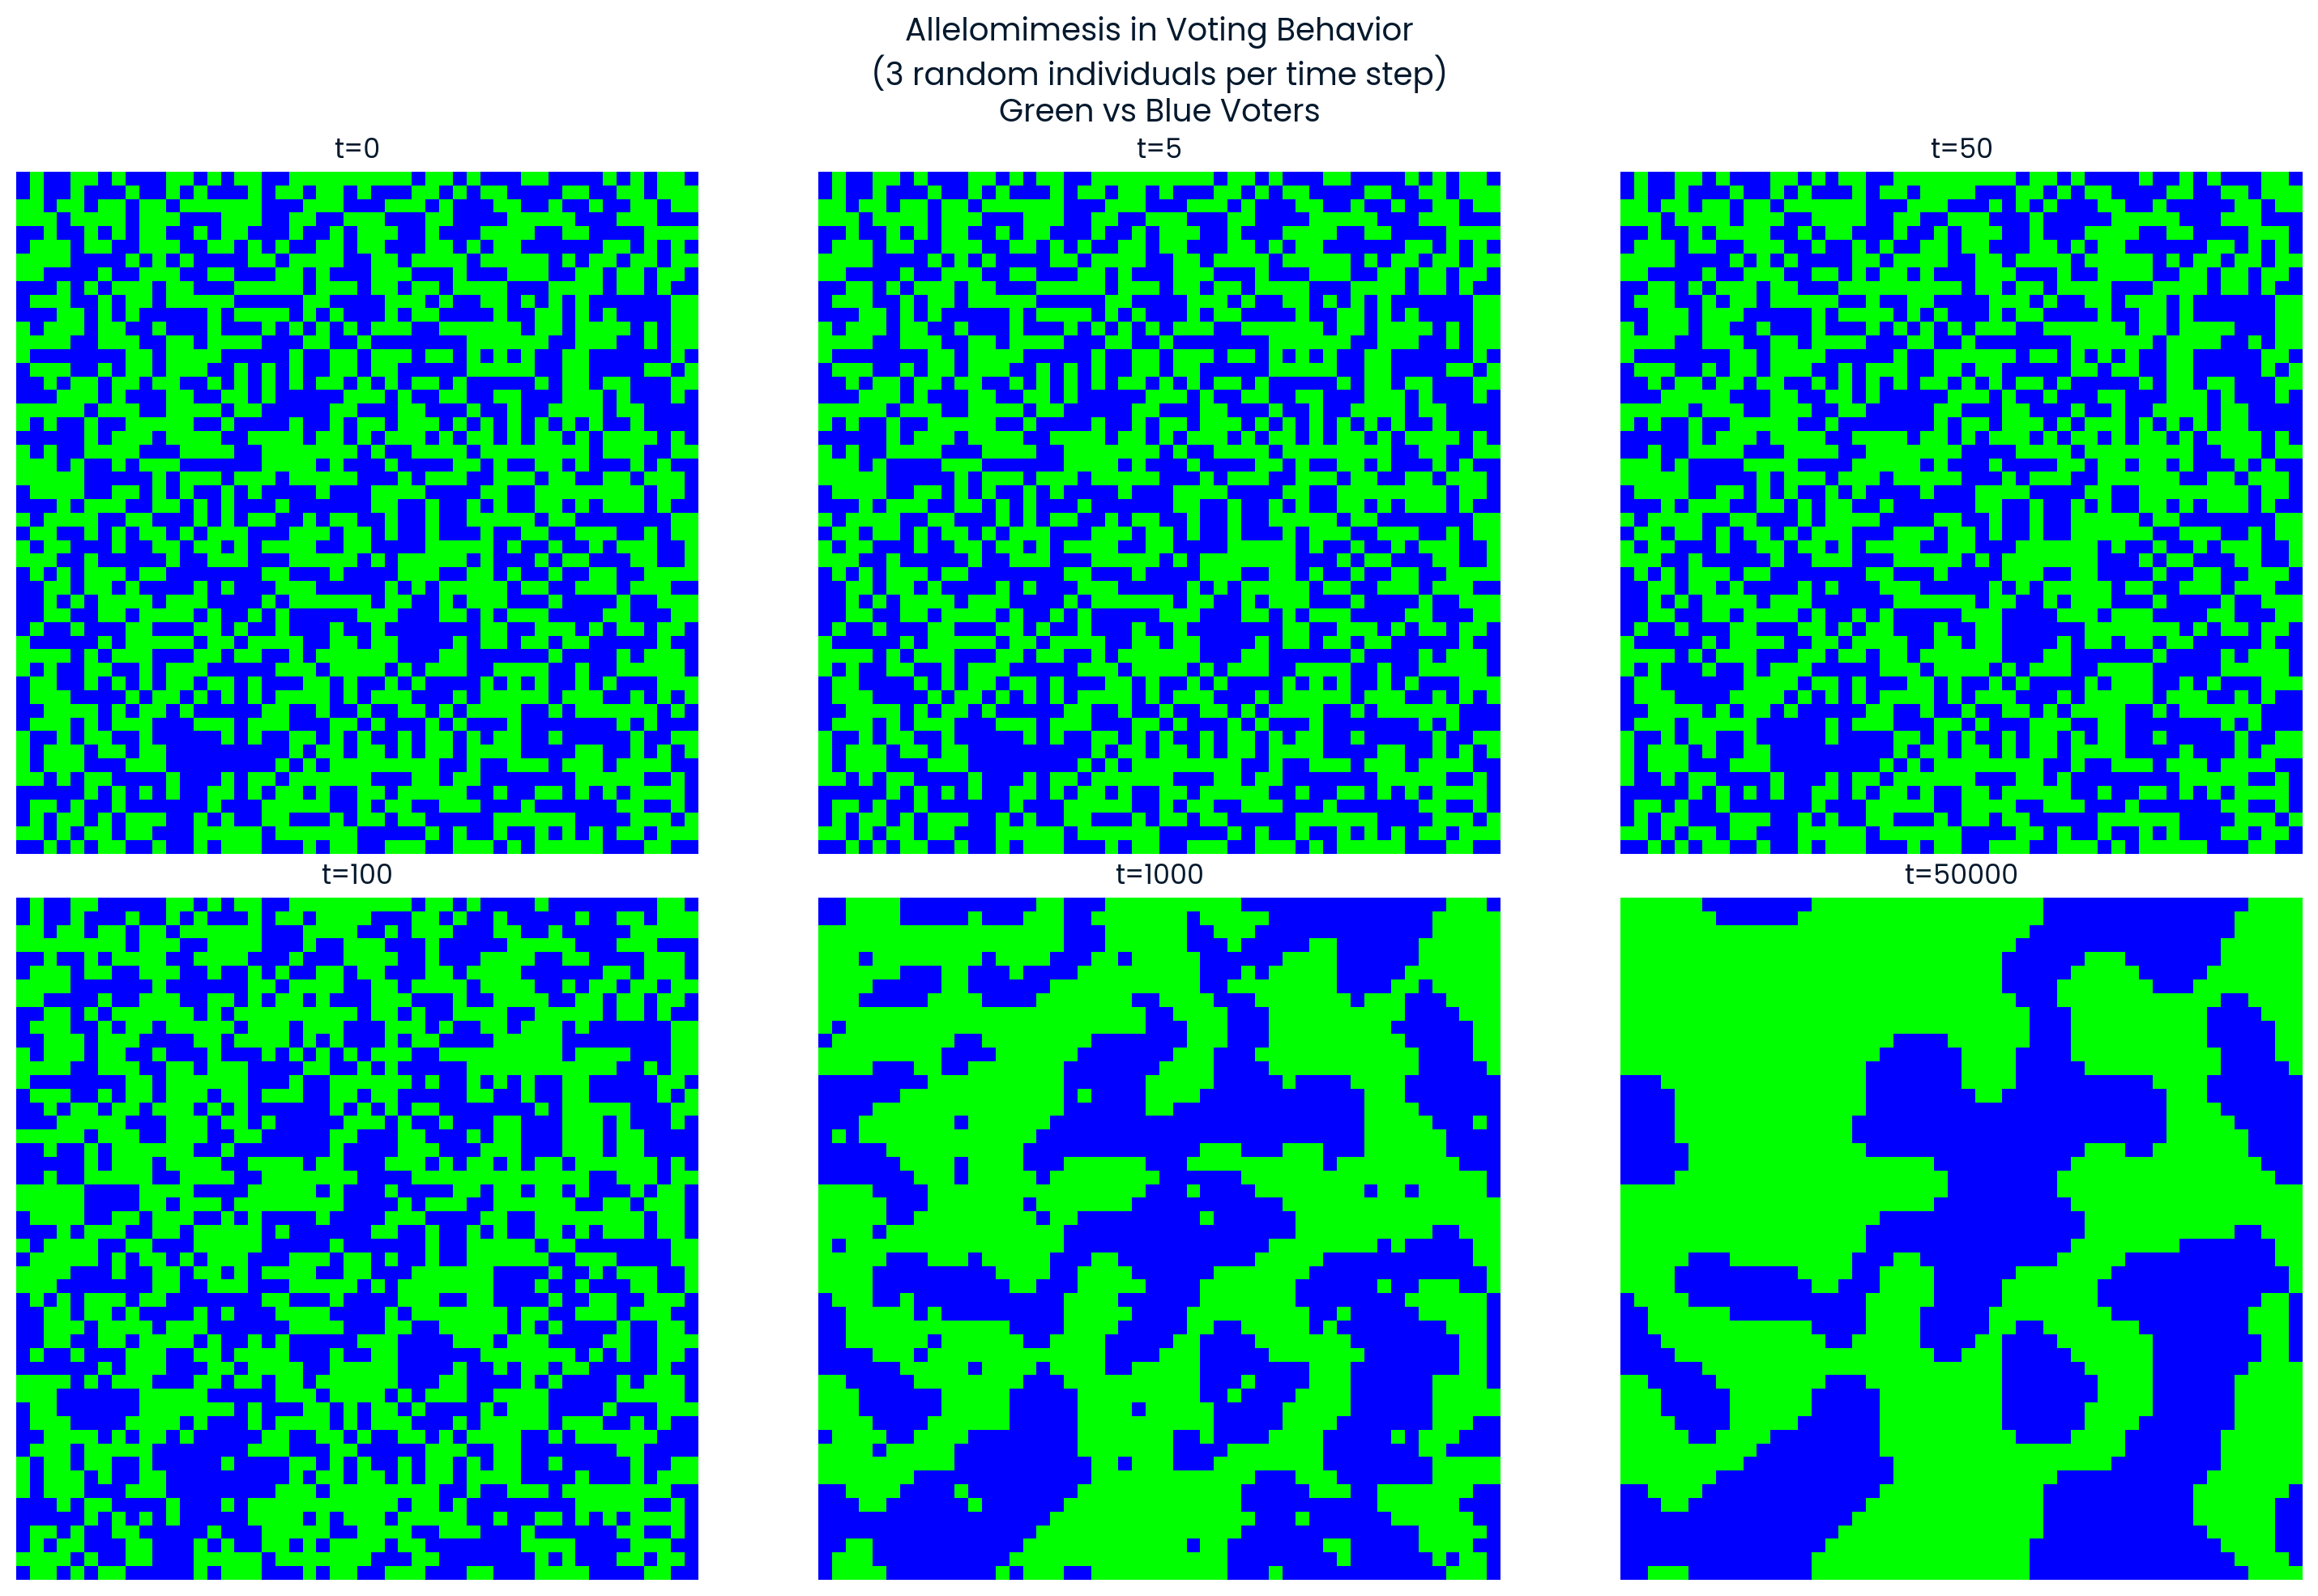

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random

class VotingGrid:
    def __init__(self, size=50):
        self.size = size
        # Initialize grid randomly with green [0,1,0] or blue [0,0,1]
        self.grid = np.zeros((size, size, 3))
        for i in range(size):
            for j in range(size):
                self.grid[i,j] = [0,1,0] if random.random() < 0.5 else [0,0,1]
        
    def get_neighbors(self, x, y):
        # Get Moore neighborhood (8 surrounding cells)
        neighbors = []
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                if dx == 0 and dy == 0:
                    continue
                new_x, new_y = (x + dx) % self.size, (y + dy) % self.size
                neighbors.append(self.grid[new_x][new_y])
        return neighbors
    
    def step(self):
        # Randomly select 5 individuals
        for _ in range(5):
            x = random.randint(0, self.size-1)
            y = random.randint(0, self.size-1)
            
            neighbors = self.get_neighbors(x, y)
            # Count green vs blue neighbors
            green_count = sum(1 for n in neighbors if (n == [0,1,0]).all())
            blue_count = sum(1 for n in neighbors if (n == [0,0,1]).all())
            
            # Change color based on majority
            if green_count > blue_count:
                self.grid[x][y] = [0,1,0]  # Change to green
            elif blue_count > green_count:
                self.grid[x][y] = [0,0,1]  # Change to blue

# Create simulation
size = 50
sim = VotingGrid(size)

# Create a 2x3 subplot
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Allelomimesis in Voting Behavior\n(3 random individuals per time step)\nGreen vs Blue Voters', fontsize=14)

# Initial state
axes[0][0].imshow(sim.grid)
axes[0][0].set_title('t=0')
axes[0][0].axis('off')

# Run simulation for some time steps
time_steps = [5, 50, 100, 1000, 50000] #[5, 10, 15, 20, 25]
for idx, t in enumerate(time_steps):
    for _ in range(t):
        sim.step()
    row = (idx + 1) // 3
    col = (idx + 1) % 3
    axes[row][col].imshow(sim.grid)
    axes[row][col].set_title(f't={t}')
    axes[row][col].axis('off')

plt.tight_layout()
plt.show()

## Results and Discussion
The figure illustrates the temporal evolution of voting patterns through sequential snapshots at key time intervals ($t$=0, 5, 50, 100, 1000, and 50000). These snapshots, arranged in a 2×3 grid, depict the system's progression from an initial random state to a final organized configuration on a 50×50 lattice. Each cell in the grid represents an individual voter with a binary choice (depicted in green or blue), and the temporal sequence demonstrates how local allelomimetic interactions facilitate the emergence of larger-scale voting patterns. The visualization elucidates the system's transformation across multiple timescales, from early-stage random fluctuations to the eventual formation of stable, macroscopic voting blocs.



### Temporal Dynamics of Bloc Formation
The evolution of voting blocs can be characterized by distinct developmental phases from $t$=0 to $t$=50000. In the **_initial phase_** ($t$=0 to $t$=50), the system exhibits a random, well-mixed distribution of green and blue voters, with small, scattered clusters indicating minimal changes and suggesting short-term behavioral stability. During the _**medium-term phase**_ ($t$=100 to $t$=1000), a significant transition occurs, marked by the emergence of larger clusters and increasingly defined boundaries between green and blue regions. This progression reaches its **_long-term phase_** at $t$=50000, where the system develops expansive and distinct regions, each defined by smooth and curved boundaries. The result demonstrates how local copying behavior can lead to global pattern formation through simple neighbor-influence rules, even in the absence of central coordination.

### Spatial Distribution of Voting Blocs
The spatial organization of voting blocs reveals patterns analogous to various physical and social phenomena. The initial random distribution evolves into increasingly organized structures, exhibiting clear geographical clustering akin to models of opinion dynamics and cultural segregation. At $t$=50000, distinct regions of green and blue voters form compact areas with irregular yet continuous boundaries, as opposed to elongated or fragmented patterns. This spatial correlation in voting patterns parallels phase separation in physical systems, where similar elements tend to cluster together. The allelomimetic mechanism promotes the formation of cohesive communities, illustrating how local interactions can generate complex global spatial patterns.

### Stability and Persistence of Identified Blocs
The spatial organization of voting blocs reveals patterns analogous to various physical and social phenomena. The initial random distribution evolves into increasingly organized structures, exhibiting clear geographical clustering akin to models of opinion dynamics and cultural segregation. At $t$=50000, distinct regions of green and blue voters form compact areas with irregular yet continuous boundaries, as opposed to elongated or fragmented patterns. This spatial correlation in voting patterns parallels phase separation in physical systems, where similar elements tend to cluster together. The allelomimetic mechanism promotes the formation of cohesive communities, illustrating how local interactions can generate complex global spatial patterns.

## Future Work and Recommendations

The findings of this study indicate several promising avenues for future research. The model could be refined by incorporating additional parameters, such as variable copying probabilities ($p$<1), to simulate uncertainty in decision-making, or by introducing multiple voting options beyond the binary green/blue choices to reflect more complex electoral systems. The impact of neighborhood size could be examined by comparing Moore and von Neumann neighborhoods or by introducing weighted influences based on distance. Another valuable direction would be the inclusion of 'stubborn' agents who maintain fixed preferences, simulating party loyalists or opinion leaders. The temporal dynamics could be further explored by implementing different updating schemes, such as synchronous updates or varying the number of random selections per time step. Additionally, external factors could be incorporated, such as global influence terms representing media effects or periodic perturbations simulating electoral campaigns. The spatial aspects could be extended to different lattice geometries or network structures to better represent real-world social connections. Finally, quantitative metrics could be developed to measure bloc formation rates, boundary stability, and cluster sizes, enabling more rigorous comparisons across different parameter sets.





In this project, I developed a computational model that simulates the emergence of voting blocs through allelomimetic behavior on a lattice framework. By implementing simple copying rules among neighboring agents, the model demonstrates how local interactions can lead to the formation of larger, stable voting communities without central coordination. The temporal evolution from random initial states to well-defined voting regions provides insights into how political preferences naturally cluster and stabilize in geographic spaces. I hope this work will help researchers better understand the fundamental mechanisms underlying collective voting behavior, particularly in the context of Philippine politics, where regional voting blocs, religious group voting, and geographical political preferences significantly shape electoral outcomes. This framework offers a foundation for future studies aiming to unravel the complex interplay between local interactions and voting patterns in the Philippine political landscape, from the influence of political dynasties to the emergence of regional strongholds.


If you have questions, please send them over at jprmaulion[at]gmail[dot]com. Cheers!
